In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\train_data.csv",index_col = 0)
df_test = pd.read_csv(r"C:\Users\hp\Downloads\test_data.csv",index_col=0)
sample_solution = pd.read_csv(r"C:\Users\hp\Downloads\sample_solution.csv",index_col=0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...
19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


Ma'lumotlar hammasida to'liq

ID: Ketma - ketlik uchun qo'yilgan sonlar.

Airline: Parvoz qilingan aviakompaniya nomi.

Flight: Parvoz qilingan ID raqami.

Source_city: Parvoz qaysi shahardan boshlanishi.

Departure_time: Samolyotning ketish vaqti.

Stop: Parvoz davomida to'xtashlar soni.

Arrival_time: Qaytish vaqti.

Destination_city: Qaysi davlatga parvoz qilinayotgani.

Class: Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.

Duration: Parvoz davomiyligi.

Days_left: Samolyotning qancha vaqtdan keyin qaytishi.

In [4]:
df.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


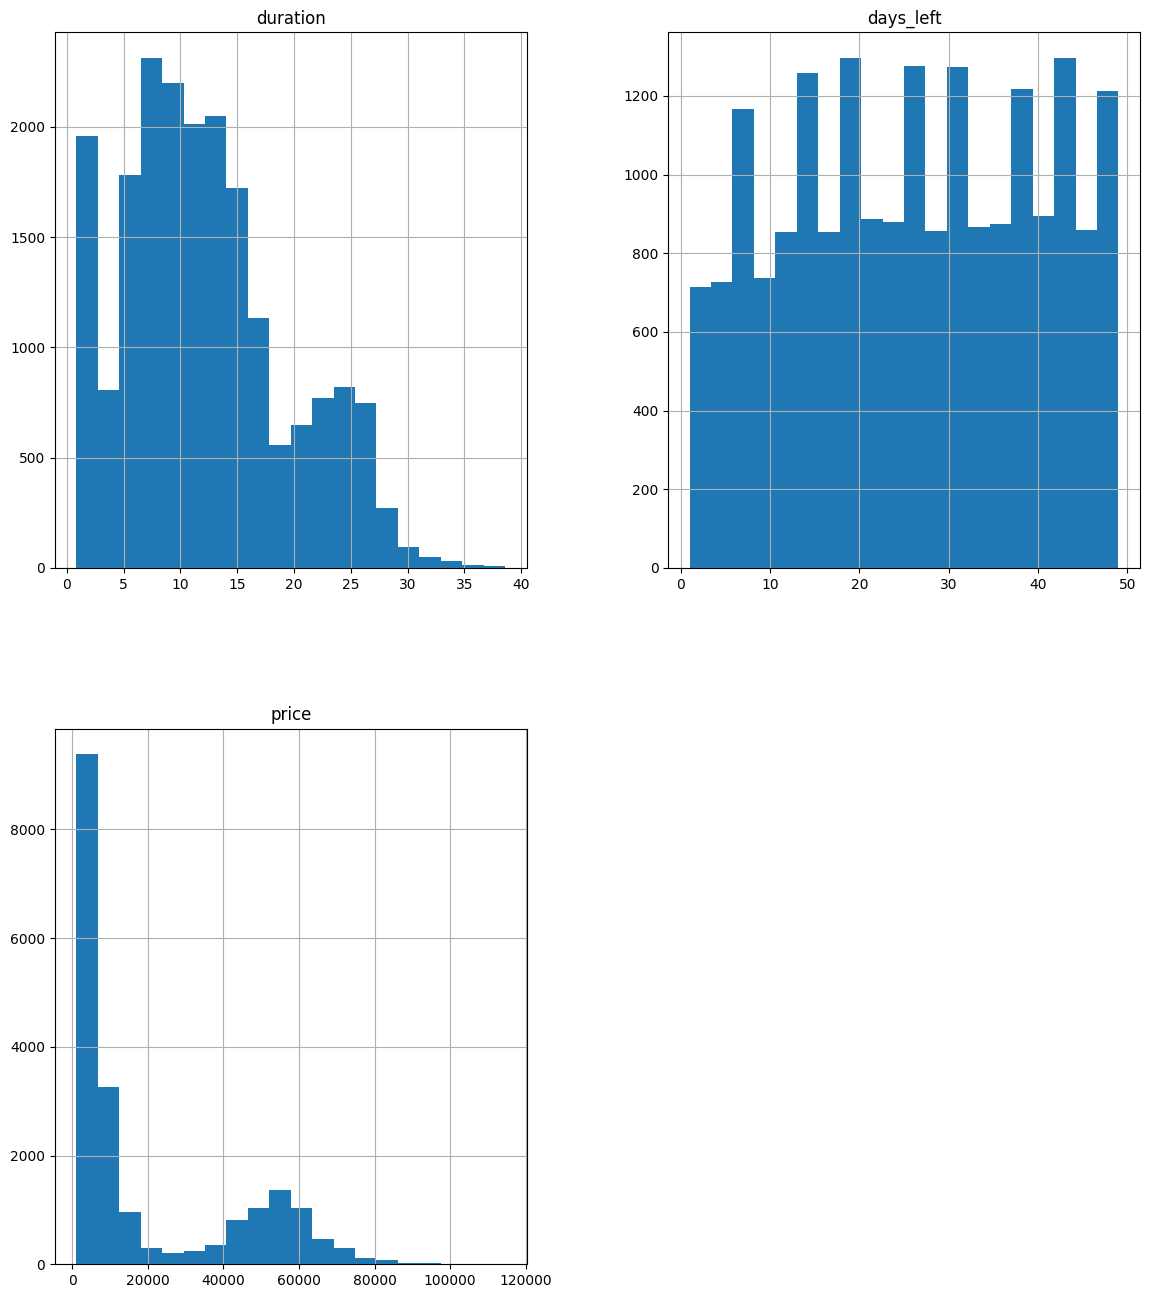

In [5]:
df.hist(bins=20 , figsize = (14 , 16))
plt.show()

In [6]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
# df['arrival_time'].value_counts()

In [8]:
# stops = {'one' : 1 , 'zero' : 0 , 'two_or_more':2}
# classes = {'Economy':0 , 'Business':1}
# df['stops'] = df['stops'].replace(stops)
# df['class'] = df['class'].replace(classes)
# departure_time  = {'Early_Morning':1 , 'Morning':2 ,'Afternoon':3,'Evening':4 ,'Night':5 , 'Late_Night':6}
# df['departure_time'] = df['departure_time'].replace(departure_time)
# arrival_time = {'Early_Morning':5 , 'Morning':3 ,'Afternoon':4 ,'Evening':2,'Night':1 , 'Late_Night':6}
# df['arrival_time'] = df['arrival_time'].replace(arrival_time)

In [9]:
# df.select_dtypes(['object']).columns

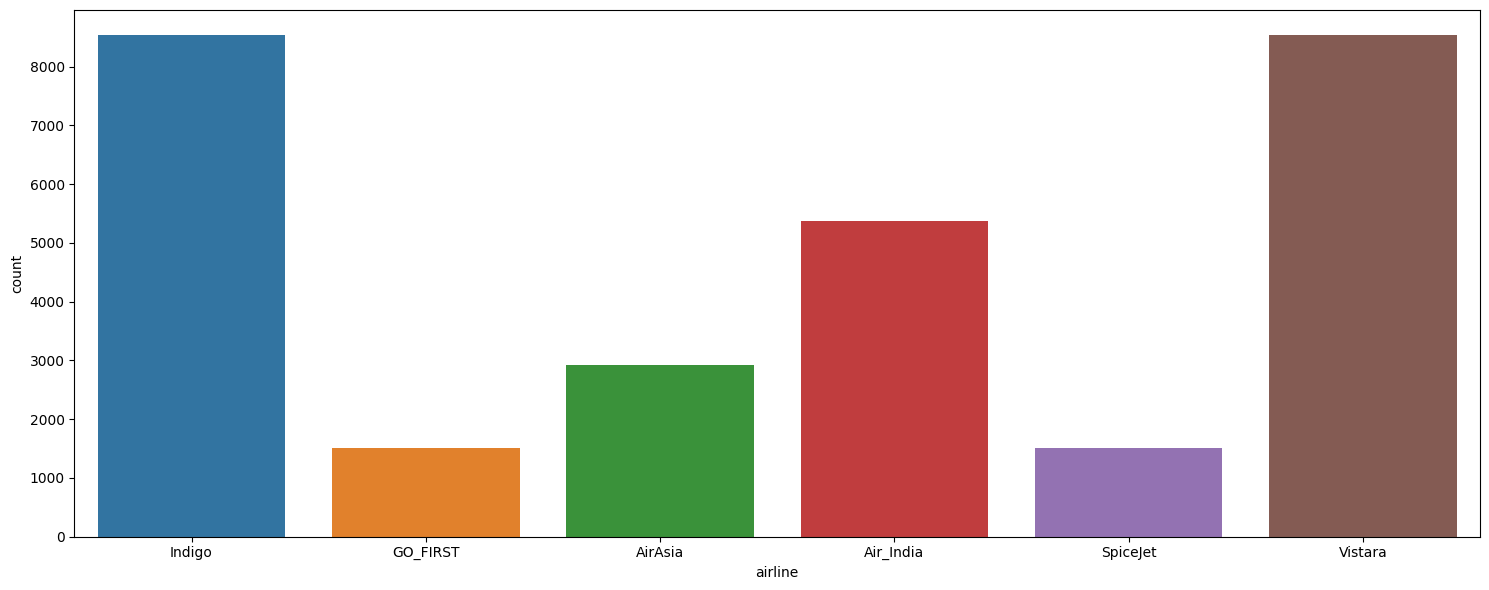

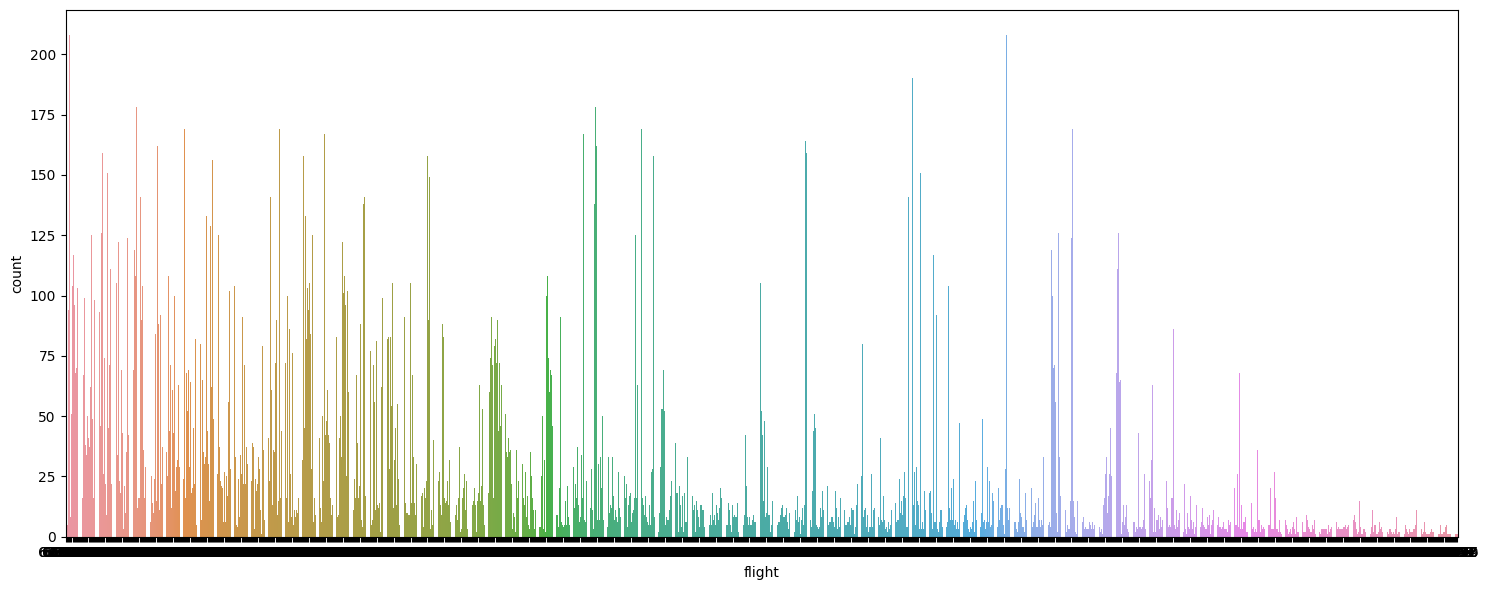

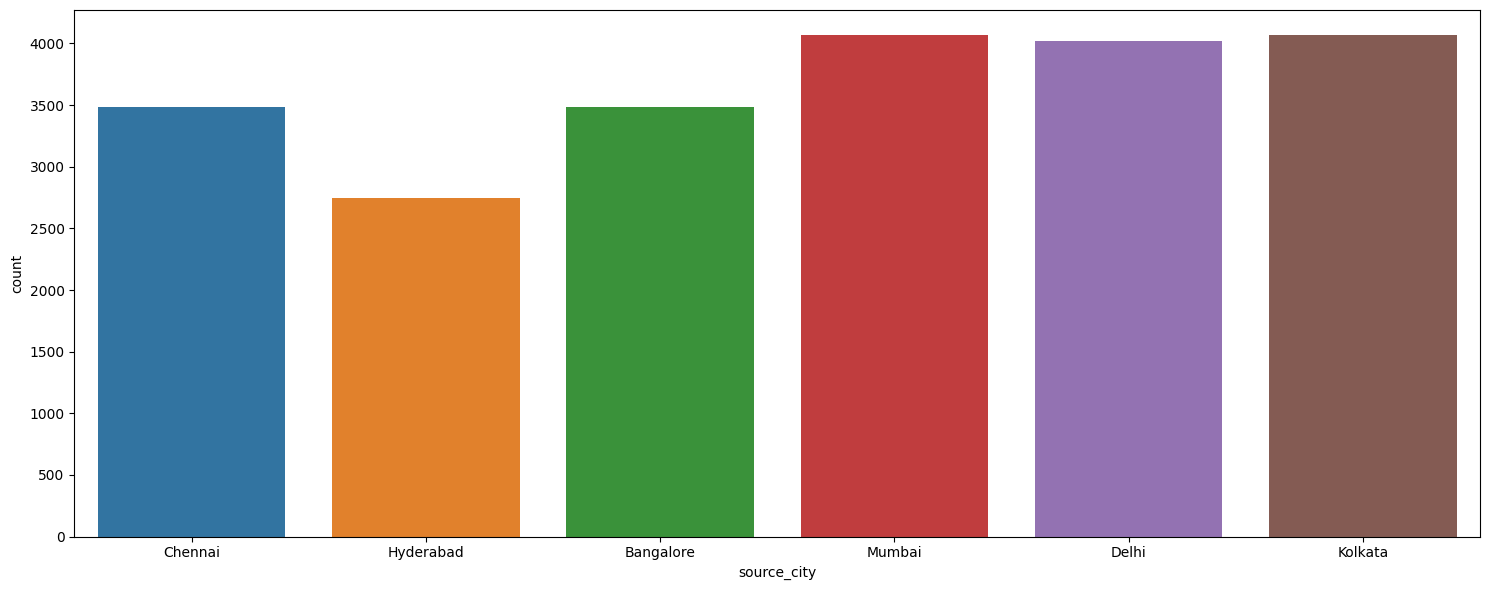

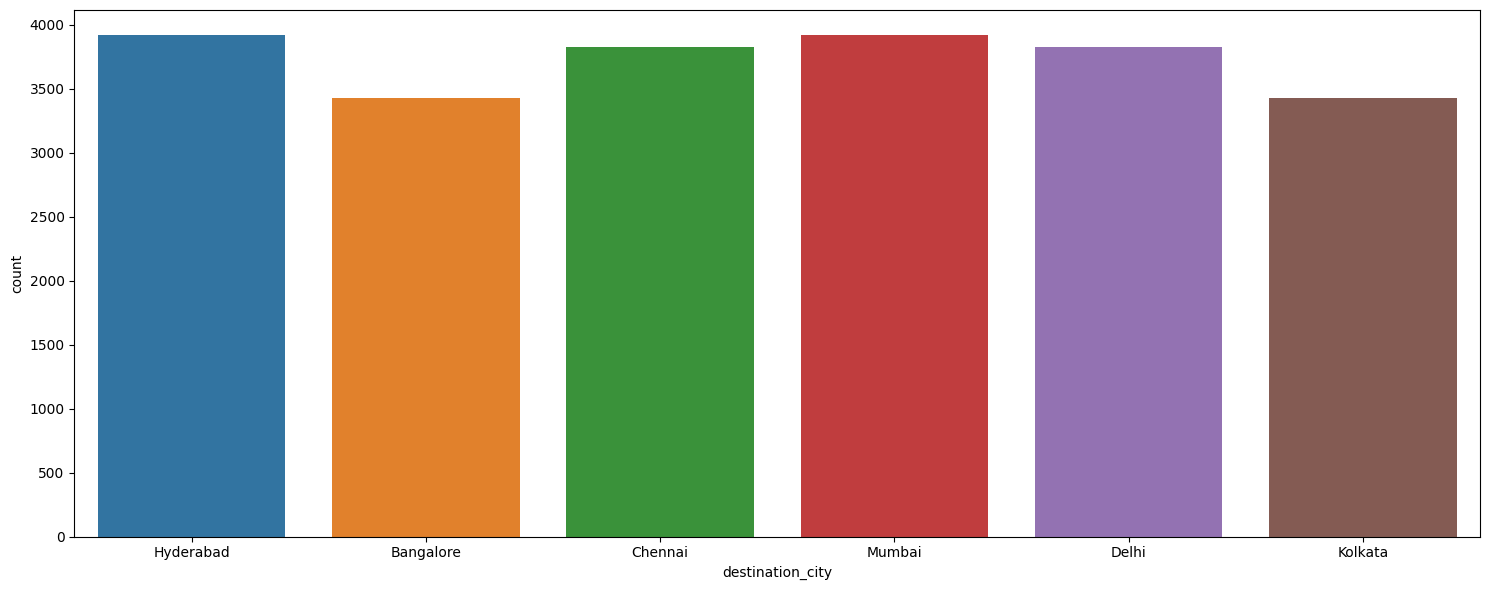

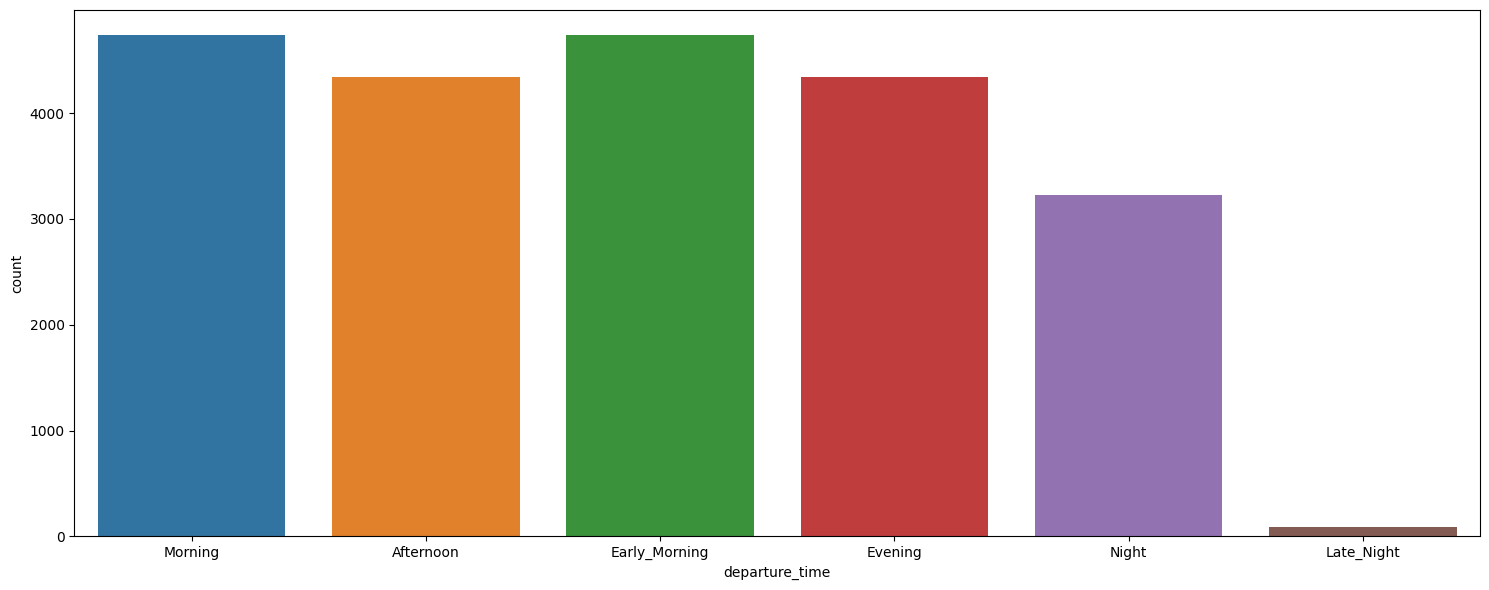

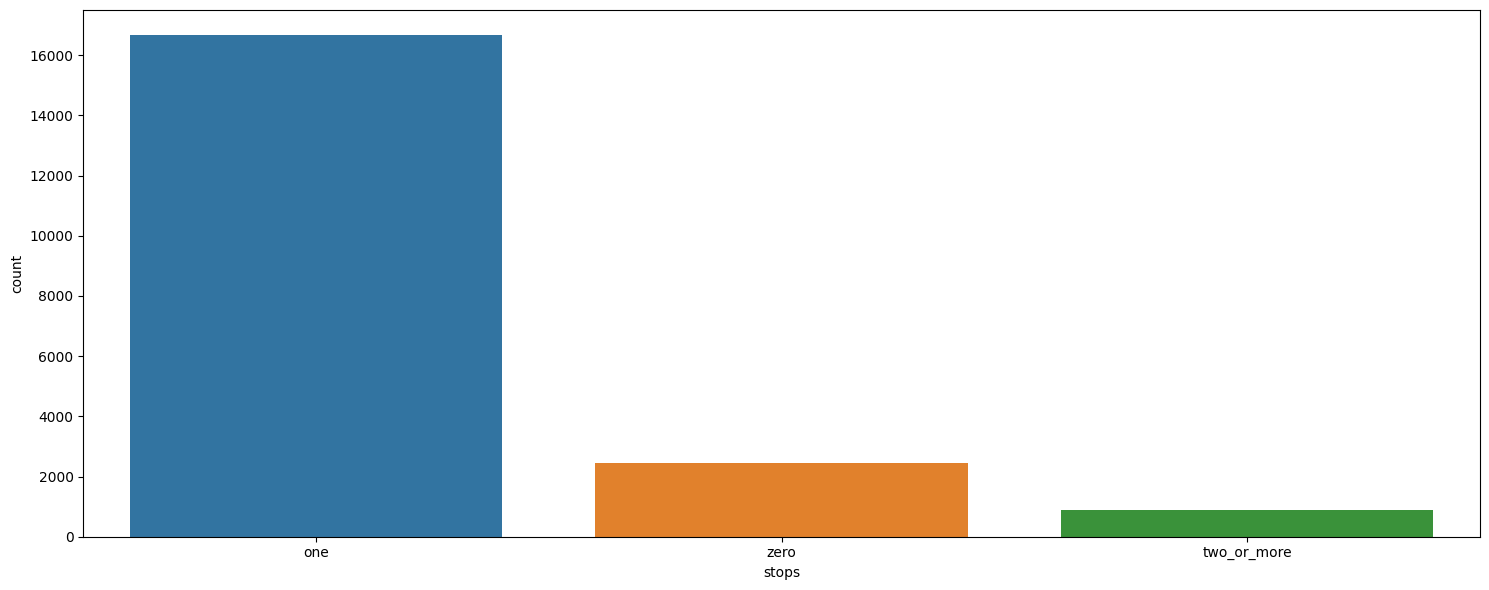

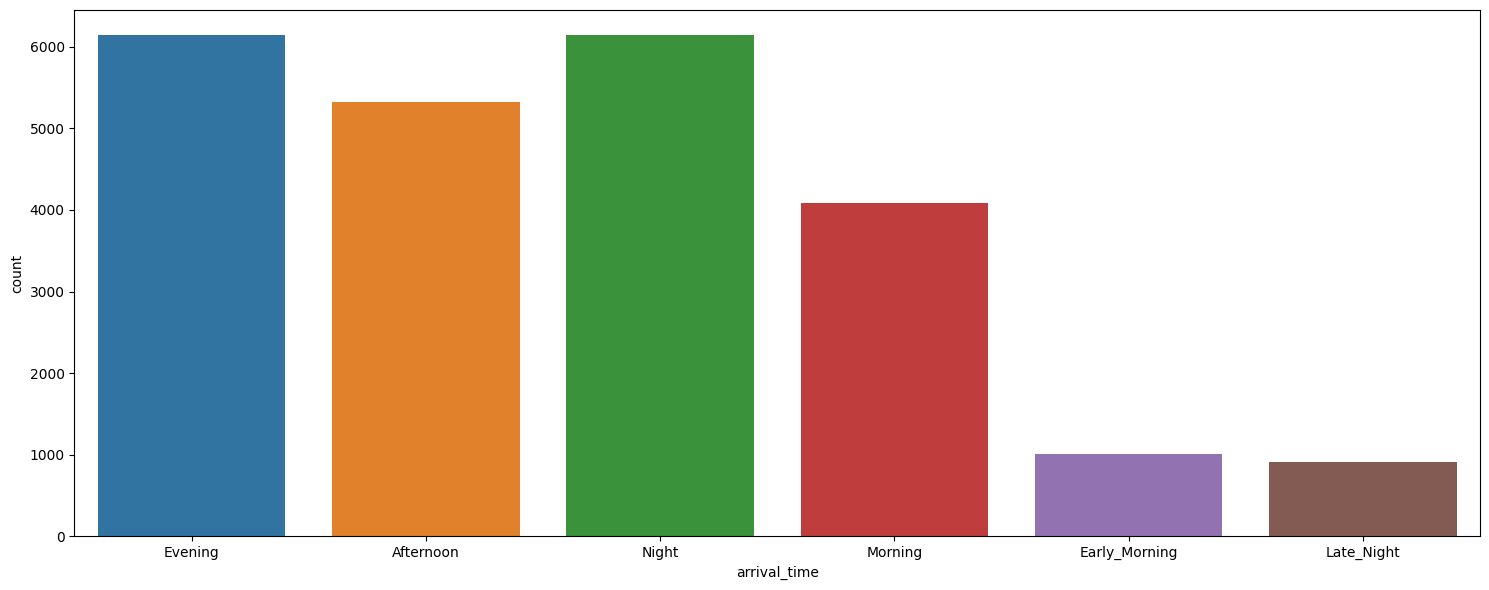

In [10]:
for i in ['airline', 'flight', 'source_city', 'destination_city' , 'departure_time','stops','arrival_time']:
    plt.figure(figsize=(15,6))
    sns.countplot(data = df , x = i)
    ax = sns.countplot(x=i ,data = df.sort_values('price',ascending = True))
    plt.tight_layout()
    plt.show()
    print("\n\n")

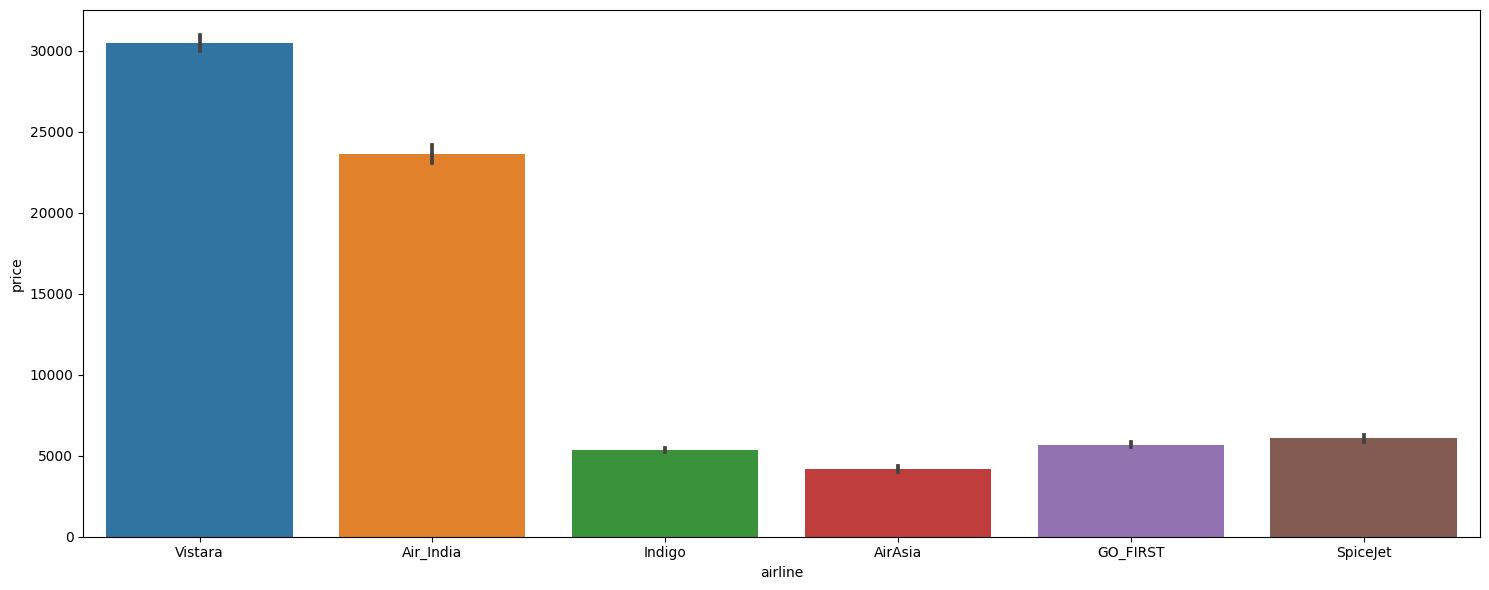

In [11]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x='airline',y='price',data = df.sort_values('price' , ascending = False))
plt.tight_layout()
plt.show()

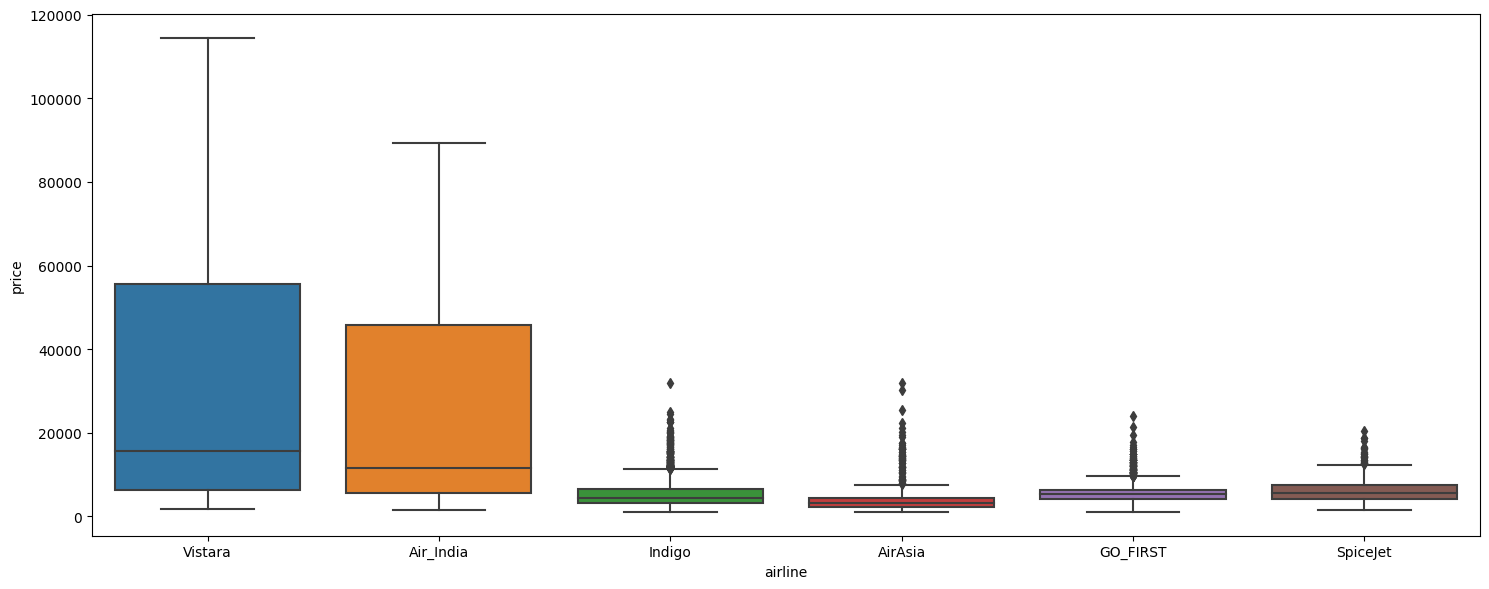

In [12]:
plt.figure(figsize = (15,6))
ax = sns.boxplot(x='airline',y='price',data = df.sort_values('price' , ascending = False))
plt.tight_layout()
plt.show()

In [13]:
# df.groupby('airline').describe()['price'].sort_values('mean',ascending = False)

In [14]:
# Airline = pd.get_dummies(data = df['airline'] , drop_first = True)
# df = pd.concat([df , Airline] , axis=1)
# df['Air_India'] = df['Air_India'].replace({False:0 , True:1})
# df['GO_FIRST'] = df['GO_FIRST'].replace({False:0 , True:1})
# df['Indigo'] = df['Indigo'].replace({False:0 , True:1})
# df['SpiceJet'] = df['SpiceJet'].replace({False:0 , True:1})
# df['Vistara'] = df['Vistara'].replace({False:0 , True:1})
# df

In [15]:
# df.drop('airline' ,axis=1 , inplace = True)
# df.head()

In [16]:
# df["somecolumn"] = df["somecolumn"].astype(int)

In [17]:
# list1 = ['source_city', 'destination_city']
# for l in list1:
#     print(df[[l]].value_counts())

In [18]:
# df = pd.get_dummies(data = df , columns = list1 , drop_first = True)
# df.head()

In [19]:
# df['source_city_Chennai'] = df['source_city_Chennai'].replace({False:0 , True:1})
# df['source_city_Delhi'] = df['source_city_Delhi'].replace({False:0 , True:1})
# df['source_city_Hyderabad'] = df['source_city_Hyderabad'].replace({False:0 , True:1})
# df['source_city_Kolkata'] = df['source_city_Kolkata'].replace({False:0 , True:1})
# df['source_city_Mumbai'] = df['source_city_Mumbai'].replace({False:0 , True:1})
# df['destination_city_Chennai'] = df['destination_city_Chennai'].replace({False:0 , True:1})
# df['destination_city_Delhi'] = df['destination_city_Delhi'].replace({False:0 , True:1})
# df['destination_city_Hyderabad'] = df['destination_city_Hyderabad'].replace({False:0 , True:1})
# df['destination_city_Kolkata'] = df['destination_city_Kolkata'].replace({False:0 , True:1})
# df['destination_city_Mumbai'] = df['destination_city_Mumbai'].replace({False:0 , True:1})
# df.head()

In [20]:
df.drop("flight" , axis=1 , inplace = True)
df_test.drop('flight',axis=1,inplace = True)

In [21]:
# flight['flight_1'] = flight['flight'].str.split('-').str[0]
# flight['flight_2'] = flight['flight'].str.split('-').str[1]
# flight['flight_3'] = flight['flight'].str.split('-').str[2]
# flight['flight_4'] = flight['flight'].str.split('-').str[3]
# flight['flight_5'] = flight['flight'].str.split('-').str[4]

# flight.head()

In [22]:
# flight.fillna('None' ,inplace = True)
# flight.head()

In [23]:
# from sklearn.preprocessing import LabelEncoder
# L_E = LabelEncoder()
# for i in range(1,6):
#     col = 'flight_' + str(i)
#     flight[col] = L_E.fit_transform(flight[col])
# flight.head()

In [24]:
# df = pd.concat([df ,flight] , axis=1)
# df.head()

In [25]:
# df.drop('flight' ,axis=1 ,inplace = True)
df.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,
1,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [26]:
# temp_col = df.columns.to_list()
# print(temp_col , '\n')

# new_col = temp_col[:7] + temp_col[8:]
# new_col.append(temp_col[7])
# print(new_col , '\n')

# df = df.reindex(columns = new_col)
# df.head()

In [27]:
from sklearn.model_selection import train_test_split as tts
train_set , test_set = tts(df , test_size = 0.0015 , random_state = 40)

x_train = train_set.drop("price",axis=1)
y = train_set["price"].copy()

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([("std_scaler",StandardScaler())])

In [29]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19970 entries, 6166 to 11591
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           19970 non-null  object 
 1   source_city       19970 non-null  object 
 2   departure_time    19970 non-null  object 
 3   stops             19970 non-null  object 
 4   arrival_time      19970 non-null  object 
 5   destination_city  19970 non-null  object 
 6   class             19970 non-null  object 
 7   duration          19970 non-null  float64
 8   days_left         19970 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ MB


In [30]:
num = x_train[['days_left','duration']].copy()
number_class = list(num)
category_class = ["airline","source_city","departure_time","stops","arrival_time" ,"destination_city","class"]

full_pipeline = ColumnTransformer([
    ("number_objects",num_pipeline , number_class),
    ("category_objects",OneHotEncoder() , category_class)
])

In [31]:
x_prep = full_pipeline.fit_transform(x_train)

In [32]:
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor()
RFR_model.fit(x_prep , y)

RandomForestRegressor()

In [33]:
test_data = x_train.sample(40)
test_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,
8754,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,13.25,22
7049,Indigo,Delhi,Evening,one,Night,Kolkata,Economy,6.17,3
11082,Vistara,Mumbai,Night,one,Evening,Chennai,Business,19.42,42
2013,Air_India,Chennai,Early_Morning,one,Night,Mumbai,Economy,14.42,45
6501,Air_India,Hyderabad,Morning,one,Morning,Chennai,Business,21.58,12
9666,Vistara,Bangalore,Morning,one,Evening,Hyderabad,Economy,8.42,2
15582,AirAsia,Bangalore,Morning,one,Evening,Kolkata,Economy,8.17,39
1067,Vistara,Mumbai,Early_Morning,one,Afternoon,Delhi,Business,8.17,46
4374,Vistara,Mumbai,Early_Morning,one,Night,Chennai,Business,12.75,27


In [34]:
label = y.loc[test_data.index]
label

id
8754      7212
7049     15563
11082    61933
2013      5571
6501     51595
9666     22609
15582     3845
1067     53152
4374     64173
9268     52063
15397     6921
19720     6271
12084    49613
7371     43305
11198     2901
13914     6032
4615     58876
16390     7891
1005     51345
10002    50361
14349     2436
18450     2482
6275      9201
3343     66063
9435      3334
10991     5888
4503      5388
11328     5219
10043     3999
503       5888
4922     44280
18822    54684
2967      2361
12954     1890
14617     2074
19845    68317
17710     2750
7323     27864
6311      2098
9203      2201
Name: price, dtype: int64

In [35]:
test_data_prep = full_pipeline.transform(test_data)
test_data_prep

<40x37 sparse matrix of type '<class 'numpy.float64'>'
	with 360 stored elements in Compressed Sparse Row format>

In [36]:
y_pred = RFR_model.predict(test_data_prep)
y_pred

array([ 7048.13, 14760.36, 62961.49,  5312.02, 51595.  , 19443.69,
        4162.  , 51672.96, 63400.42, 52350.51,  6828.22,  6986.01,
       50067.86, 46213.54,  2901.  ,  6383.19, 57099.29,  6798.02,
       50932.99, 52902.49,  3147.16,  2943.68,  9570.17, 66593.77,
        3699.33,  5792.82,  5190.76,  5182.4 ,  4270.31,  5738.12,
       47855.73, 54684.  ,  2425.15,  2572.25,  2074.  , 65841.8 ,
        3045.42, 27988.32,  2256.52,  2255.46])

In [37]:
pd.DataFrame({'prediction':y_pred , 'Real value':label})

,prediction,Real value
id,,
8754,7048.13,7212
7049,14760.36,15563
11082,62961.49,61933
2013,5312.02,5571
6501,51595.00,51595
9666,19443.69,22609
15582,4162.00,3845
1067,51672.96,53152
4374,63400.42,64173


In [38]:
x_test = test_set.drop("price",axis=1)
x_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,
12878,Vistara,Chennai,Early_Morning,one,Night,Mumbai,Business,14.33,35
17257,Vistara,Hyderabad,Afternoon,one,Morning,Bangalore,Business,21.83,7
17980,Vistara,Hyderabad,Afternoon,one,Morning,Chennai,Economy,22.92,29
16293,Air_India,Mumbai,Night,one,Night,Chennai,Economy,26.08,3
13380,Indigo,Chennai,Evening,zero,Evening,Bangalore,Economy,1.00,45
17907,Air_India,Kolkata,Afternoon,one,Night,Delhi,Economy,10.75,43
12247,Vistara,Kolkata,Evening,one,Morning,Bangalore,Economy,13.92,33
15484,Vistara,Chennai,Evening,one,Morning,Mumbai,Business,17.75,46
14032,GO_FIRST,Hyderabad,Early_Morning,zero,Morning,Delhi,Economy,2.00,41


In [39]:
y_test = test_set["price"].copy()
y_test

id
12878    64113
17257    49859
17980     6602
16293     9201
13380     1443
17907     5467
12247     8111
15484    64113
14032     2276
10303     6024
16231     6195
6725      1830
16288     4262
4535      6200
16258     2949
12758     1443
10406     8011
11897     3090
2559     58315
1195      1998
8579      4210
17367     7516
17184    15615
6318      4755
13764     2700
11847    50361
12578    69244
6436      2464
1619     60232
16817     6024
Name: price, dtype: int64

In [40]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

def rmse():
    print(np.sqrt(mean_squared_error(y_test , y_pred)))
    print(mean_absolute_error(y_test , y_pred))

In [41]:
x_test_prep = full_pipeline.transform(x_test)

y_pred = RFR_model.predict(x_test_prep)
rmse()

2617.9416812972236
1336.8100000000004


In [42]:
t_test_prep = full_pipeline.transform(df_test)
t_y_pred = RFR_model.predict(t_test_prep)

In [43]:
sample_solution.head()

,price
id,
1,0
2,0
3,0
4,0
5,0


In [44]:
sample_solution['price'] = t_y_pred

In [45]:
sample_solution

,price
id,
1,52117.39
2,57698.71
3,23235.08
4,2491.75
5,5701.49
...,...
4996,60052.22
4997,4503.67
4998,50460.70


In [46]:
sample_solution.to_csv("submission1.csv")

In [47]:
sub = pd.read_csv(r"C:\Users\hp\submission_7.csv",index_col = 0)

In [48]:
sub

,id,price
0,1,56709.51
1,2,11778.91
2,3,49725.00
3,4,5017.66
4,5,28267.66
...,...,...
4995,4996,4481.72
4996,4997,16762.63
4997,4998,6301.45
4998,4999,4007.97
